## Test with your video name uploaded from relevant drive 

In [2]:
from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [117]:
cd '/content/drive/My Drive/CSCE_689/Test_video'

/content/drive/My Drive/CSCE_689/Test_video


In [0]:
video='8000_4'## Input your video name
video_name=str(video)+'.mp4' 
# model_type='TL' ## NN for developed architecture, TL for transfer learning model

## Load Test Video

In [608]:
!pip install mlxtend
import mlxtend
from mlxtend.image import extract_face_landmarks

In [0]:
def eye_aspect_ratio(eye):
	
	A = distance.euclidean(eye[1], eye[5])
	B = distance.euclidean(eye[2], eye[4])
	C = distance.euclidean(eye[0], eye[3])
	ear = (A + B) / (2.0 * C)
	return ear

In [0]:
def mouth_aspect_ratio(mouth):
    A = distance.euclidean(mouth[14], mouth[18])
    C = distance.euclidean(mouth[12], mouth[16])
    mar = (A ) / (C)
    return mar

In [0]:
def circularity(eye):
    A = distance.euclidean(eye[1], eye[4])
    radius  = A/2.0
    Area = math.pi * (radius ** 2)
    p = 0
    p += distance.euclidean(eye[0], eye[1])
    p += distance.euclidean(eye[1], eye[2])
    p += distance.euclidean(eye[2], eye[3])
    p += distance.euclidean(eye[3], eye[4])
    p += distance.euclidean(eye[4], eye[5])
    p += distance.euclidean(eye[5], eye[0])
    return 4 * math.pi * Area /(p**2)

In [0]:

def mouth_over_eye(eye):
    ear = eye_aspect_ratio(eye)
    mar = mouth_aspect_ratio(eye)
    mouth_eye = mar/ear
    return mouth_eye

In [0]:
def jaw_dist(jaw,nose):
  list= np.array([distance.euclidean(d, nose) for d in jaw])
  return list.max()/list.mean()



In [0]:
def getFrame(sec):
    start = 0
    vidcap.set(cv2.CAP_PROP_POS_MSEC, start + sec*1000)
    hasFrames,image = vidcap.read()
    return hasFrames, image

In [0]:
def get_landmarks(vidcap):
  sec = 0
  frameRate = 0.05
  success, image = getFrame(sec)
  count = 0
  data=[]
  # labels=[]
  timestamp=[]

  while success and count < int(vidcap.get(cv2.CAP_PROP_POS_FRAMES)):
      landmarks = extract_face_landmarks(image)
      try:
          sum(sum(landmarks))
          if sum(sum(landmarks)) != 0:
              count += 1
              data.append(landmarks)

              timestamp.append(sec)
              sec = sec + frameRate
              sec = round(sec, 3)
              success, image = getFrame(sec)

              # print('success: '+ str(success)+str(int(vidcap.get(cv2.CAP_PROP_POS_FRAMES))))
          else:
              sec = sec + frameRate
              sec = round(sec, 3)
              success, image = getFrame(sec)
              print('Face not detected')
      except:
          # print('success: '+ str(success)+str(int(vidcap.get(cv2.CAP_PROP_POS_FRAMES))))
          count=int(vidcap.get(cv2.CAP_PROP_POS_FRAMES))
          pass
      # print(count)
  return data,timestamp

In [616]:
from scipy.spatial import distance
import cv2
data = []
labels = []
frmes=[]
timestamp=[]
vidcap = cv2.VideoCapture(video_name)
data=get_landmarks(vidcap)[0]
timestamp=get_landmarks(vidcap)[1]


/usr/local/lib/python3.6/dist-packages/mlxtend/image/extract_face_landmarks.py:61: UserWarning: No face detected.
  warnings.warn('No face detected.')


Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected


In [0]:
import numpy as np
import math
data = np.array(data)
features = []
main_list=[]
jaw_list=[]
for d in data:
    eye = d[36:68]
    nose=d[28]
    jaw=d[5:13]
    main_list.append(eye)
    ear = eye_aspect_ratio(eye)
    mar = mouth_aspect_ratio(eye)
    cir = circularity(eye)
    movt = jaw_dist(jaw,nose)
    mouth_eye = mouth_over_eye(eye)
    features.append([ear, mar, cir, mouth_eye,movt])

In [0]:
import pandas as pd
df_features=pd.DataFrame(features)

In [619]:
##Normalizing the input features
df_normalised=df_features.apply(lambda x: (x[0:5]-df_features.mean())/df_features.std(),axis=1)
df_normalised

,0,1,2,3,4
0,0.989355,0.070584,1.293521,-0.702719,-1.047031
1,0.989355,-1.664009,1.293521,-1.206922,-1.047031
2,0.931770,0.075750,1.084383,-0.674607,-0.933291
3,-2.062280,-1.727642,-1.373232,1.163972,-1.731985
4,-0.682518,-0.752429,-1.471771,0.038780,-1.242607
...,...,...,...,...,...
152,2.707473,1.895827,-0.679953,-0.898855,5.246965
153,2.171946,3.032028,0.661671,-0.437341,0.378119
154,-1.584234,-0.659972,1.578100,1.047858,1.791498
155,-1.627175,2.023326,-0.755975,2.543671,2.445606


In [0]:
## Merging to create a new dataframe
df=pd.merge(df_normalised,df_features,left_index=True,right_index=True)


In [0]:

try:
  inp=df.to_numpy().reshape(int(df.shape[0]),10)
except:
  inp=df[:-1].to_numpy().reshape(int(df.shape[0]),10)
  timestamp=timestamp[:-1]

## Extract Images

In [0]:
j=0
import cv2
sec = 0
frameRate = 0.05
all_image=[]
full_timestamp=[]
success, image = getFrame(sec)

count = 0
while success and count < int(vidcap.get(cv2.CAP_PROP_POS_FRAMES)):
  count += 1
  resized_image = cv2.resize(image, (224, 224))
  all_image.append(resized_image)
  full_timestamp.append(sec)
  sec = sec + frameRate
  sec = round(sec, 3)
  success, image = getFrame(sec)
  j=j+1

## Load Model

In [106]:
cd '/content/drive/My Drive/CSCE_689/'

/content/drive/My Drive/CSCE_689


In [107]:
from tensorflow.keras.models import load_model
import joblib
# load json and create model
loaded_model=load_model("model.h5")
LR=joblib.load("LR.sav")
NB=joblib.load("clf_NB.sav")
KNN=joblib.load("KNN.sav")
MLP=joblib.load("MLP.sav")
SVM=joblib.load("SVM.sav")
RF=joblib.load("RF.sav")
ABC=joblib.load("ABC.sav")
XGB=joblib.load("XGB.sav")
blend=load_model('blend.h5')
tl_model=load_model('vgg16_2.h5')
vgg19=load_model("vgg19_2.h5")
rsn=load_model("rsn.h5")
print("Loaded models from disk")

Loaded models from disk


## Evaluate

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [0]:


tl_df=pd.DataFrame()
tl_df["time"]=full_timestamp
y_score_tl=[]
y_vgg19=[]
y_rsn=[]
for i in all_image:
  img = np.asarray(i)
  img = np.expand_dims(img, axis=0)
  output = tl_model.predict(img)
  output_1=vgg19.predict(img)
  output_2=rsn.predict(img)
  y_score_tl.append(output[0][1])
  y_vgg19.append(output_1[0][1])
  y_rsn.append(output_2[0][1])

tl_df["prob"]=y_score_tl
tl_df["vgg19"]=y_vgg19
tl_df["rsn"]=y_rsn

In [0]:
df=pd.DataFrame()
df['LR']=LR.predict_proba(inp)[:,1]
df['NB']=NB.predict_proba(inp)[:,1]
df['KNN']=KNN.predict_proba(inp)[:,1]
df['MLP']=MLP.predict_proba(inp)[:,1]
df['SVM']=SVM.predict_proba(inp)[:,1]
df['RF']=RF.predict_proba(inp)[:,1]
df['ABC']=ABC.predict_proba(inp)[:,1]
df['XGB']=XGB.predict_proba(inp)[:,1]
df['NN']=loaded_model.predict_proba(inp)
df['time']=timestamp

In [626]:

all=pd.merge(tl_df,df,'left',on='time')
dropcolumns=['time']
all=all.drop(dropcolumns,axis=1)
naindicator=[1 if math.isnan(i)==True else 0 for i in all["LR"]]
if all.iloc[0,:].isnull().any(): ## If the first frame of the video has no landmark, assume no yawning
  all.iloc[0,3:12]=all.iloc[0,3:12].fillna(0)
all=all.fillna(method='ffill')
all['prob']=y_score_tl
all['vgg19']=y_vgg19
all['rsn']=y_rsn
all['indicator']=naindicator
columns=['LR', 'NB', 'KNN', 'MLP', 'SVM', 'RF', 'ABC', 'XGB', 'NN',
       'prob', 'vgg19', 'rsn', 'indicator']
all=all[columns]
all.head()

,LR,NB,KNN,MLP,SVM,RF,ABC,XGB,NN,prob,vgg19,rsn,indicator
0,0.092667,0.021411,0.000000,0.047939,0.138422,0.134671,2.220446e-16,0.122896,0.040720,0.005360,0.042669,0.488451,0
1,0.119598,0.076137,0.071429,0.360433,0.183324,0.174922,2.220446e-16,0.160009,0.211240,0.003476,0.040681,0.489825,0
2,0.097722,0.025796,0.000000,0.047479,0.144654,0.134671,1.000000e+00,0.122896,0.047202,0.005762,0.050566,0.489268,0
3,0.219363,0.793747,0.035714,0.559725,0.125778,0.270093,2.220446e-16,0.241732,0.278510,0.007643,0.062785,0.488943,0
4,0.166958,0.251482,0.071429,0.215362,0.186845,0.183830,2.220446e-16,0.176477,0.212078,0.006300,0.042642,0.489272,0


In [0]:
pred_rnn=blend.predict_classes(all.values)
y_score_10=blend.predict_proba(all.values)

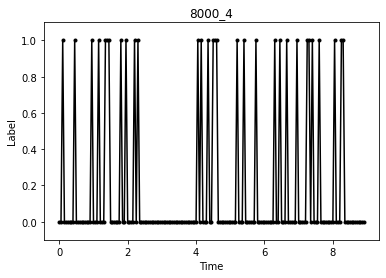

In [629]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(full_timestamp,pred_rnn,marker = '.', color = "Black")
plt.xlabel("Time")
plt.ylim(-0.1,1.1)
plt.ylabel("Label")
plt.title(str(video))
plt.show()
fig.savefig(str(video))

In [0]:
json_data=pd.DataFrame()
json_data['time']=full_timestamp
json_data['label']=pred_rnn  

In [0]:
json_data.to_json(str(video)+ ".json")